In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/원딜.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head()

C:\Users\ice_9\AppData\Local\Temp\ipykernel_28520\1361351895.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1,inplace=True)


,win,분당 킬,분당 어시,분당 데스,퍼블유무,퍼블어시유무,분당 얻은 골드,분당 피해량,분당 cc건시간,분당 CS,분당 죽은시간,분당 시야점수
0,True,0.18,0.25,0.22,False,False,336.42,382.98,0.18,4.0,4.27,0.11
1,False,0.14,0.18,0.33,False,False,338.52,489.97,0.65,4.0,7.46,0.33
2,False,0.00,0.06,0.18,False,False,241.91,111.97,0.06,5.0,3.32,0.30
3,True,0.00,0.53,0.06,False,True,370.36,298.10,0.00,7.0,0.47,0.53
4,False,0.15,0.18,0.18,False,False,335.87,424.29,0.36,6.0,5.12,0.79


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_28520\1219666417.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

1.0 0.724
0.868 0.722
0.873 0.764
0.846 0.761
0.848 0.768
0.835 0.77
0.838 0.782
0.831 0.781
0.832 0.788
0.873 0.764


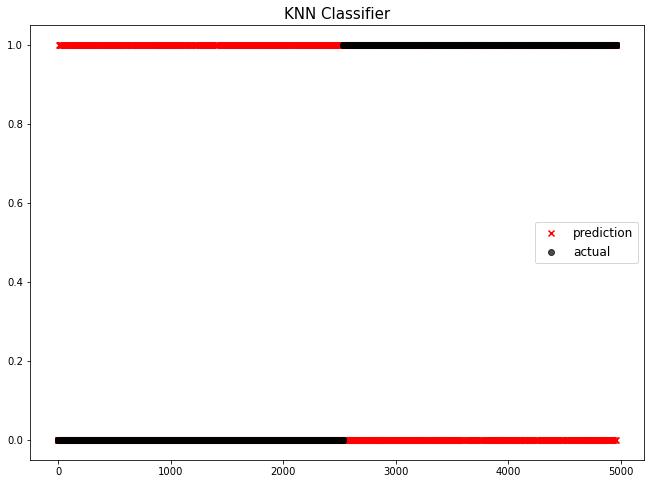

            model        f1
0  KNN Classifier  0.759811


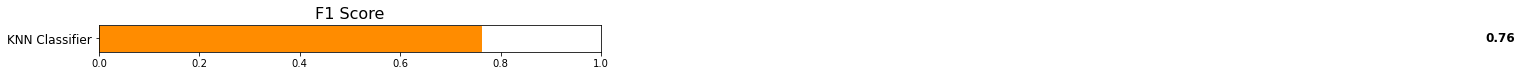

In [4]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

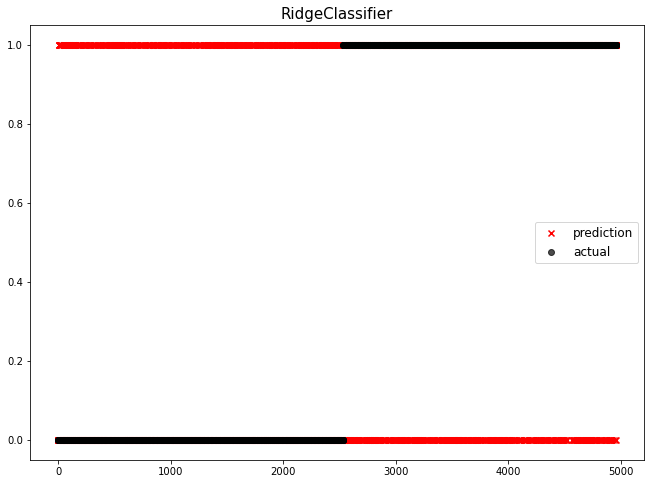

             model        f1
0  RidgeClassifier  0.811367
1   KNN Classifier  0.759811


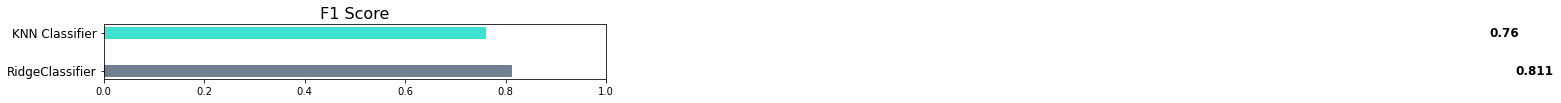

In [5]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.814 0.814


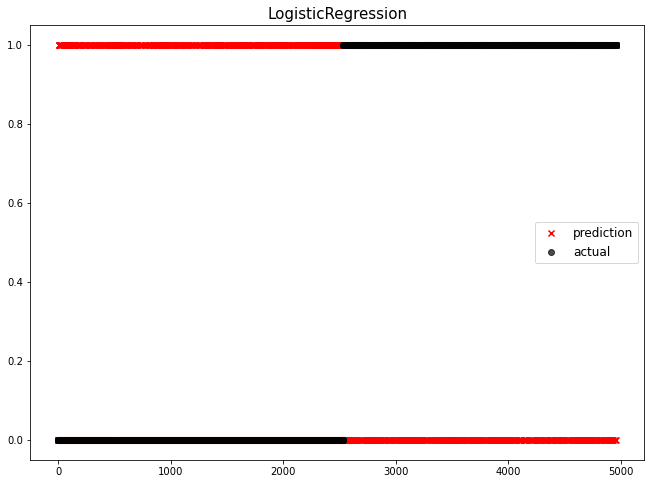

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2      KNN Classifier  0.759811


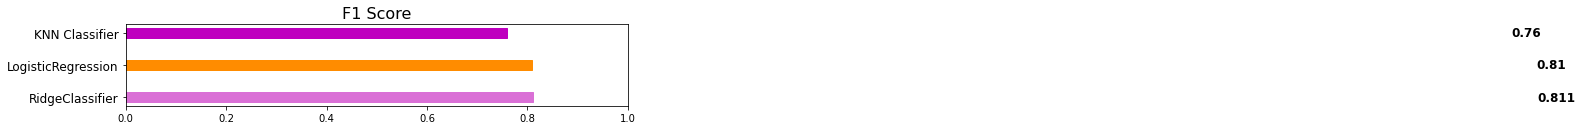

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.78 0.768


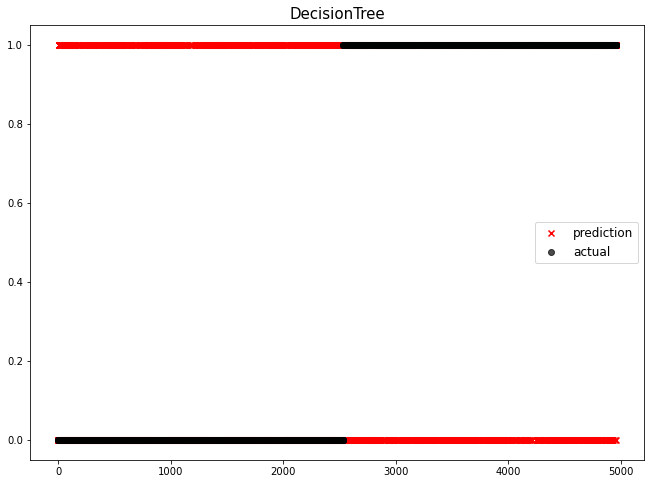

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2        DecisionTree  0.765714
3      KNN Classifier  0.759811


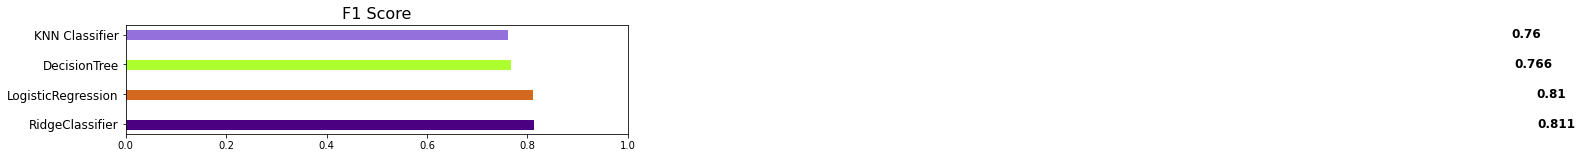

In [7]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.798 0.79


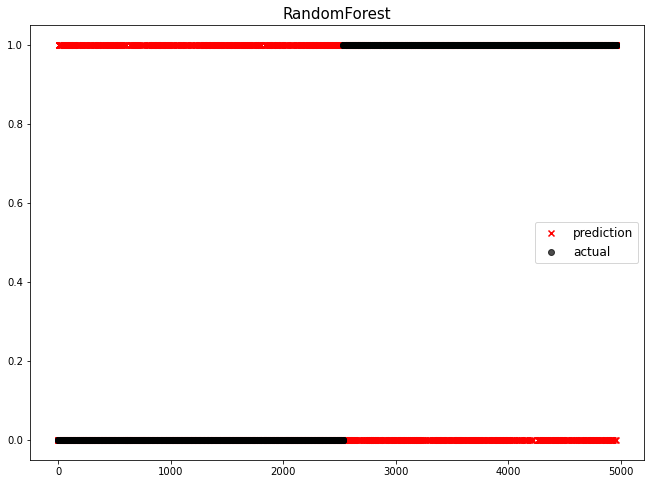

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2        RandomForest  0.787482
3        DecisionTree  0.765714
4      KNN Classifier  0.759811


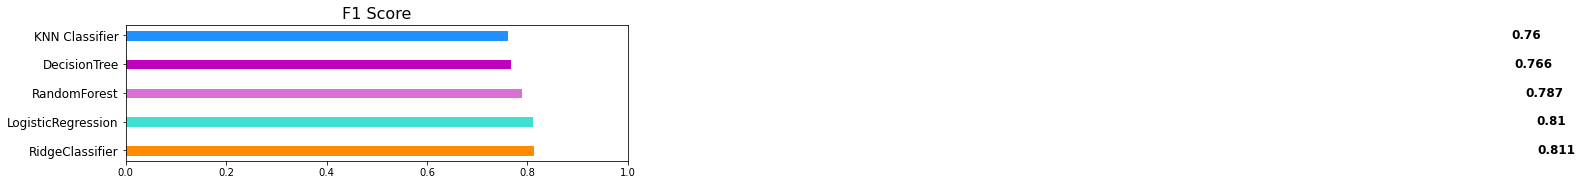

In [8]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.918 0.808


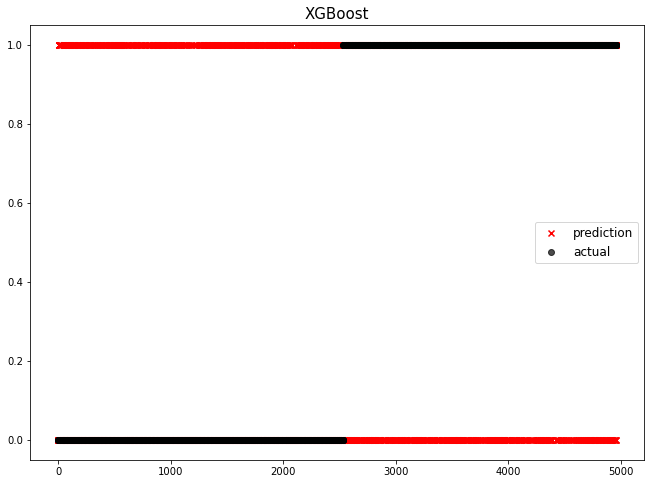

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3        RandomForest  0.787482
4        DecisionTree  0.765714
5      KNN Classifier  0.759811


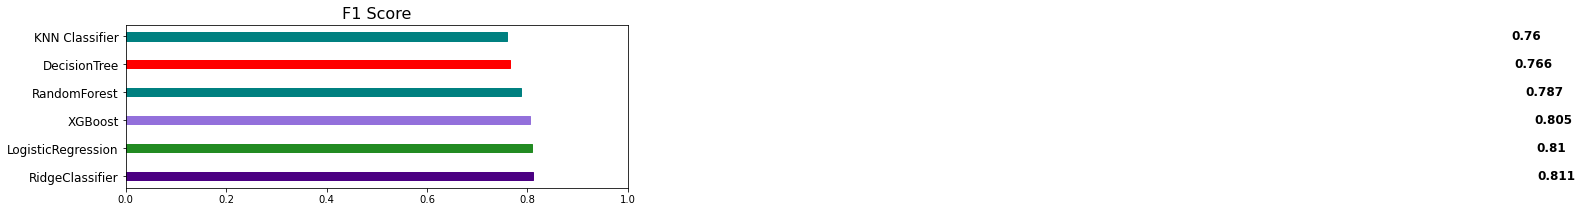

In [9]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

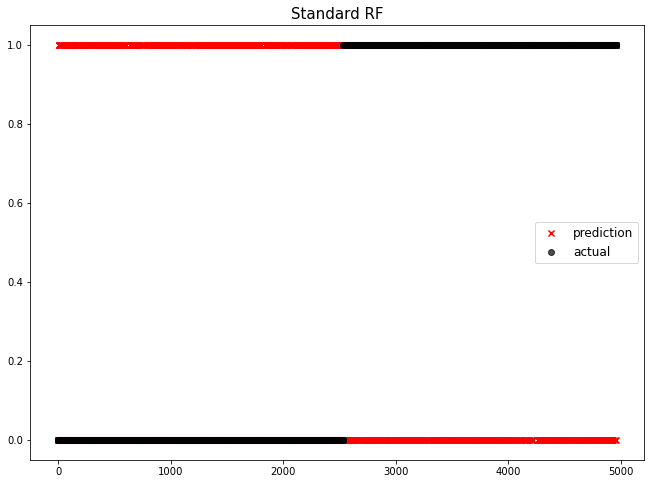

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3        RandomForest  0.787482
4         Standard RF  0.787482
5        DecisionTree  0.765714
6      KNN Classifier  0.759811


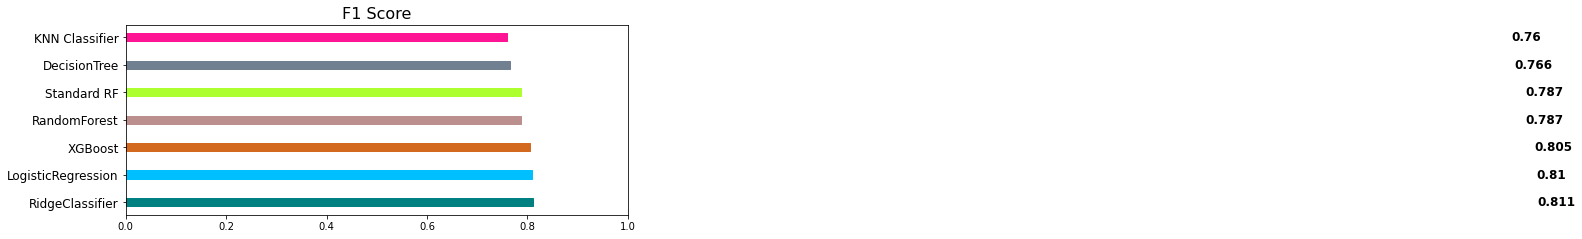

In [10]:
RF_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Standard RF', pred, y_test)

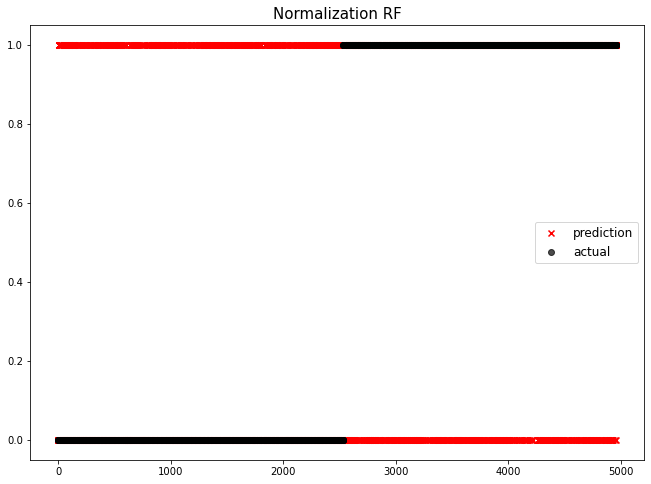

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3        RandomForest  0.787482
4         Standard RF  0.787482
5    Normalization RF  0.787482
6        DecisionTree  0.765714
7      KNN Classifier  0.759811


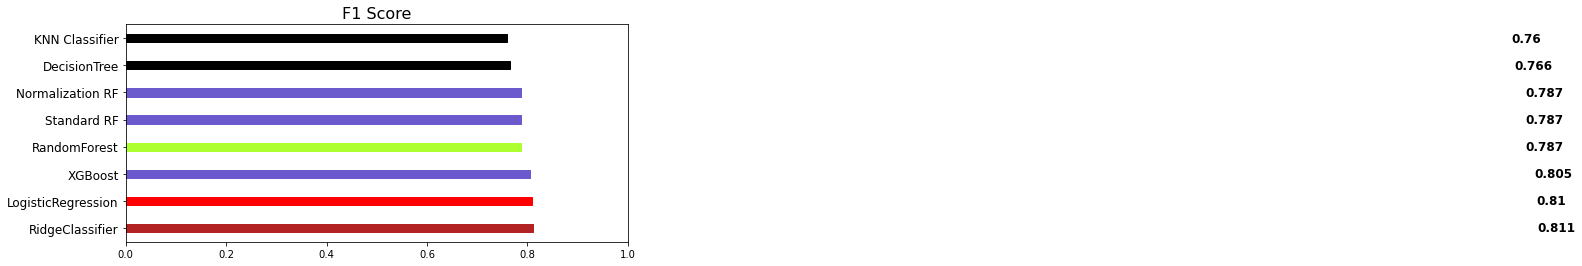

In [11]:
RF_pipeline = RandomForestClassifier(random_state = 0, max_depth = 5)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Normalization RF', pred, y_test)

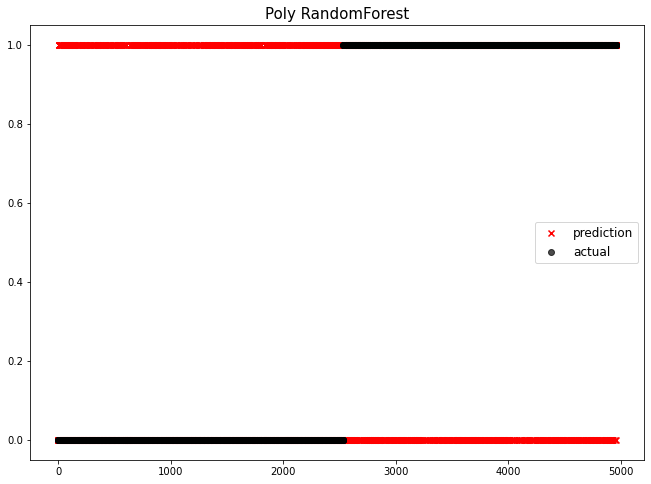

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3        RandomForest  0.787482
4         Standard RF  0.787482
5    Normalization RF  0.787482
6   Poly RandomForest  0.779918
7        DecisionTree  0.765714
8      KNN Classifier  0.759811


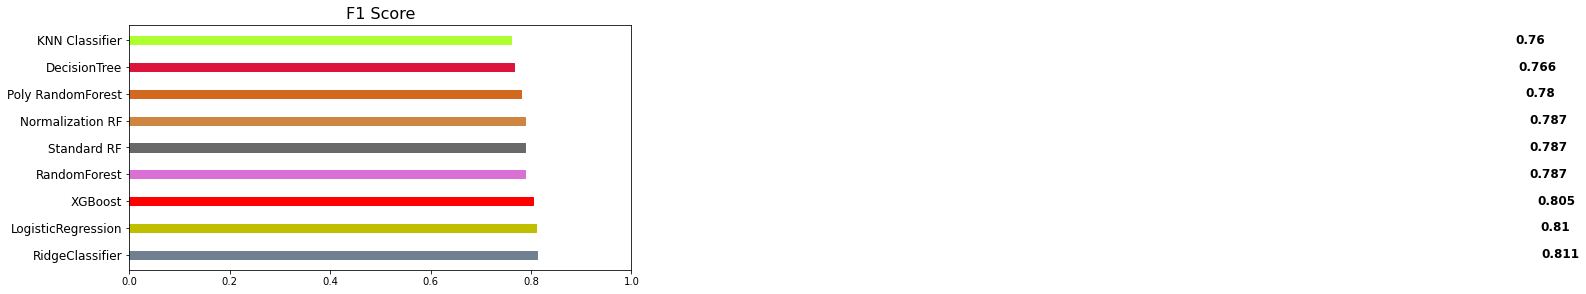

In [12]:
poly_RF_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
poly_RF_pipeline.fit(X_train, y_train)
poly_pred = poly_RF_pipeline.predict(X_test)
f1_eval('Poly RandomForest', poly_pred, y_test)

In [13]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RandomForestClassifier()),
    ('xgb', XGBClassifier())
]

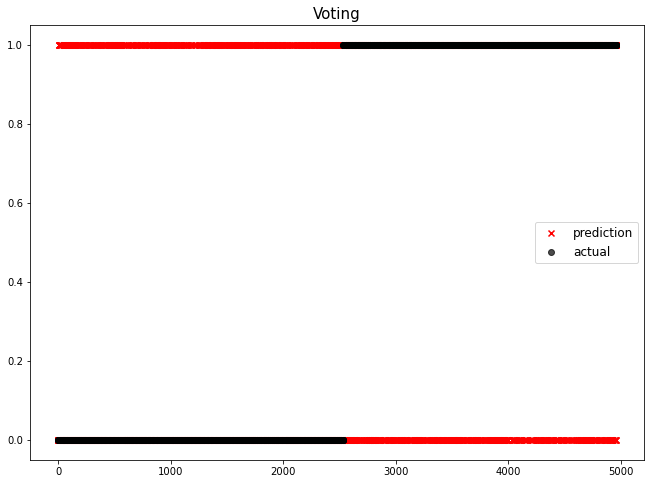

                model        f1
0     RidgeClassifier  0.811367
1              Voting  0.811255
2  LogisticRegression  0.809730
3             XGBoost  0.804673
4        RandomForest  0.787482
5         Standard RF  0.787482
6    Normalization RF  0.787482
7   Poly RandomForest  0.779918
8        DecisionTree  0.765714
9      KNN Classifier  0.759811


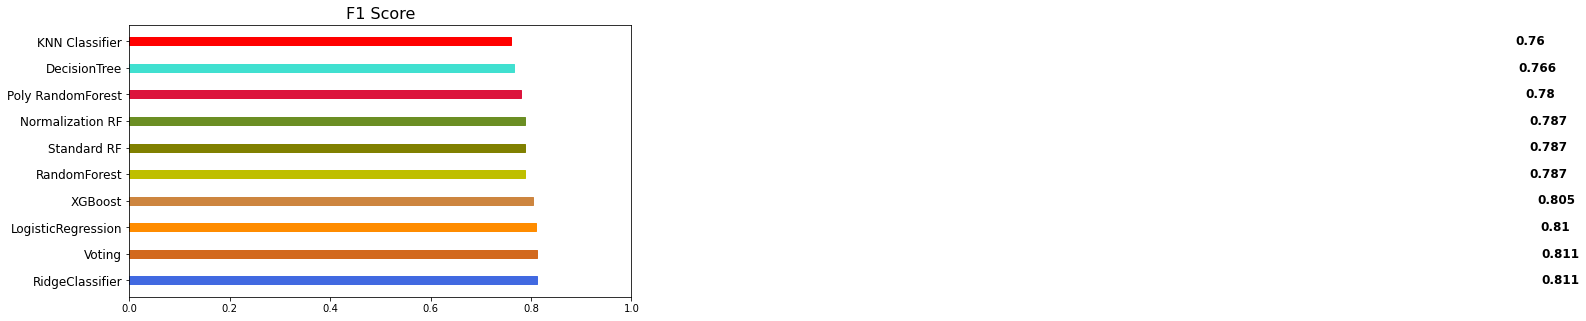

In [14]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting', pred, y_test)

In [15]:
models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RF_pipeline),
    ('xgb', XGBClassifier())
]

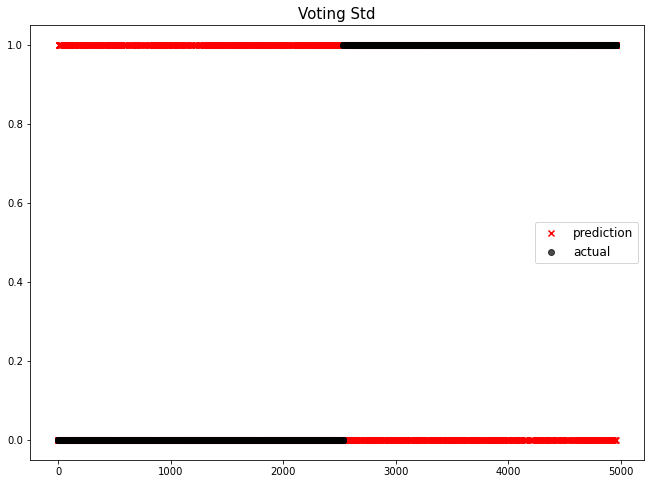

                 model        f1
0      RidgeClassifier  0.811367
1           Voting Std  0.811266
2               Voting  0.811255
3   LogisticRegression  0.809730
4              XGBoost  0.804673
5         RandomForest  0.787482
6          Standard RF  0.787482
7     Normalization RF  0.787482
8    Poly RandomForest  0.779918
9         DecisionTree  0.765714
10      KNN Classifier  0.759811


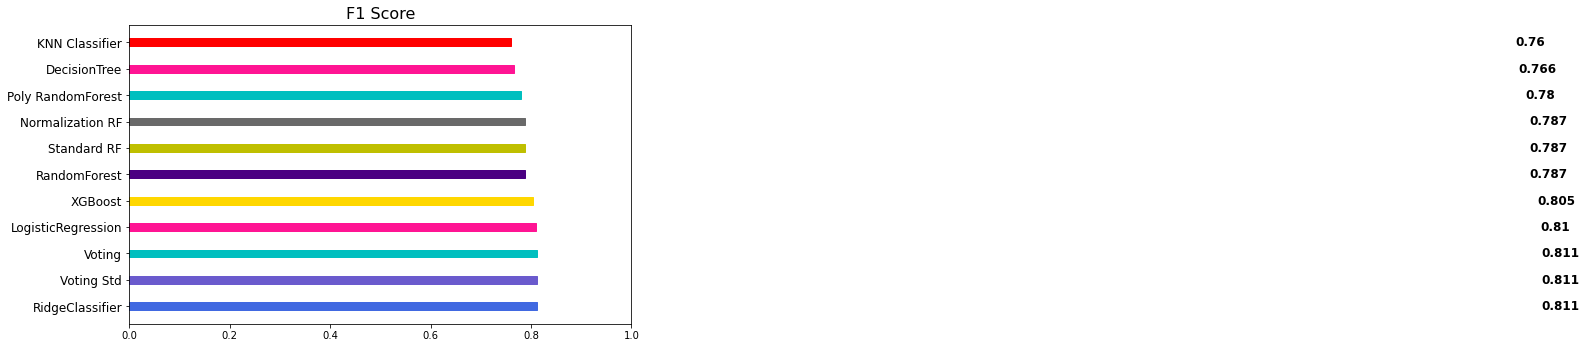

In [16]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting Std', pred, y_test)

In [17]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('randomforest', forest), 
    ('logistic', lg),
]

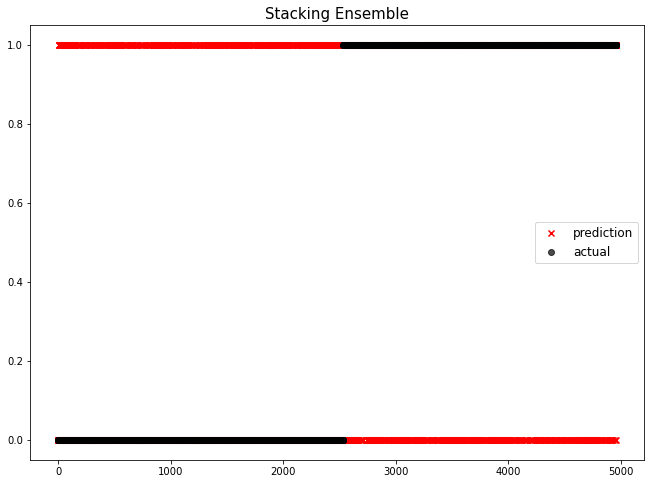

                 model        f1
0      RidgeClassifier  0.811367
1           Voting Std  0.811266
2               Voting  0.811255
3   LogisticRegression  0.809730
4              XGBoost  0.804673
5    Stacking Ensemble  0.804602
6         RandomForest  0.787482
7          Standard RF  0.787482
8     Normalization RF  0.787482
9    Poly RandomForest  0.779918
10        DecisionTree  0.765714
11      KNN Classifier  0.759811


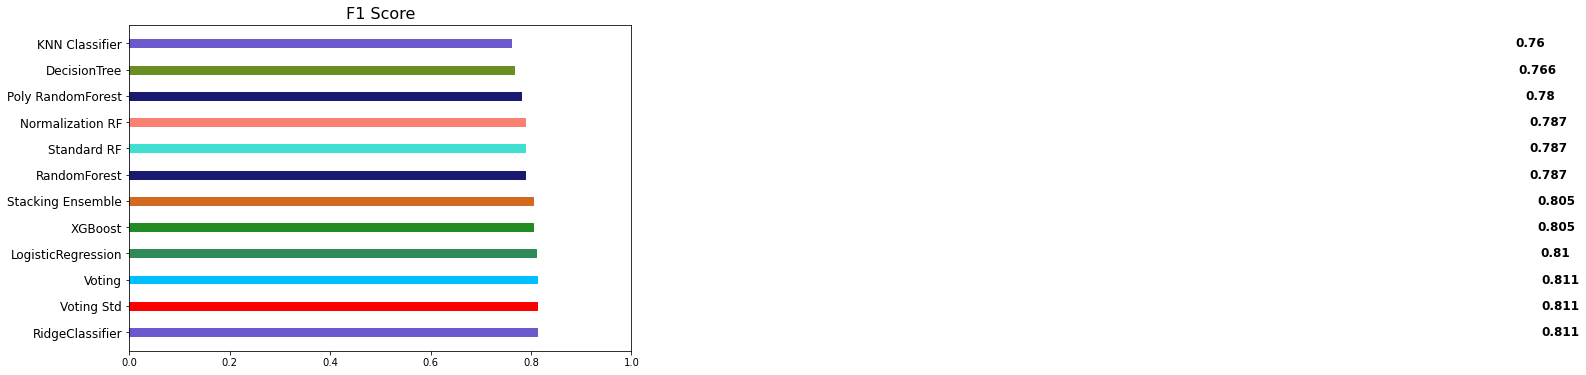

In [18]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

# 샘플 데이터, 알고리즘 3개만 사용했지만 시간이 많이 걸림을 확인 가능
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

#### hyperparameter 튜닝 후

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [249]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)        # 6개로 나눈다
n_splits = 6

In [250]:
from lightgbm import LGBMClassifier

In [251]:
from sklearn.ensemble import VotingClassifier

In [252]:
rf_best = make_pipeline(
    # StandardScaler(),
    RandomForestClassifier(max_depth=10, max_features= 0.7, min_samples_split= 5,
 n_estimators= 300, random_state= 0),
)

In [253]:
xgb_best = make_pipeline(
    XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100,
 random_state= 0, subsample= 0.7),
)


In [254]:
lgbm_best = make_pipeline(
    StandardScaler(),
    LGBMClassifier(colsample_bytree= 0.9, learning_rate= 0.01,
 max_depth= 6, n_estimators= 1500, random_state= 0,
 subsample= 0.6),
)

In [255]:
knn_best = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3),
)

In [256]:
lg_best = make_pipeline(
    # StandardScaler(),
    LogisticRegression(),
)

In [257]:
Ridge_best = make_pipeline(
    # StandardScaler(),
    RidgeClassifier(alpha=3),
)

In [258]:
from sklearn.ensemble import GradientBoostingClassifier

In [259]:
gd_best = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 0.9,
 n_estimators= 200, random_state= 0, subsample= 0.7),
)

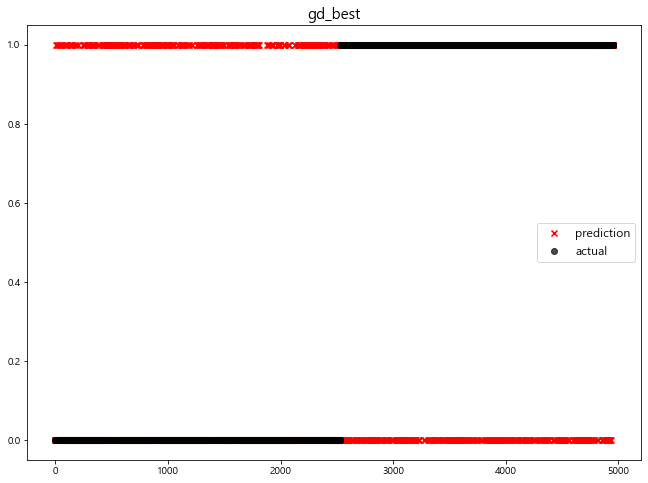

                 model        f1
0           Voting Std  0.877805
1               Voting  0.876456
2              gd_best  0.875703
3              XGBoost  0.874016
4    Stacking Ensemble  0.871434
5   LogisticRegression  0.870495
6      RidgeClassifier  0.857825
7         RandomForest  0.856498
8          Standard RF  0.856498
9     Normalization RF  0.856498
10   Poly RandomForest  0.853993
11      KNN Classifier  0.848310
12        DecisionTree  0.841908


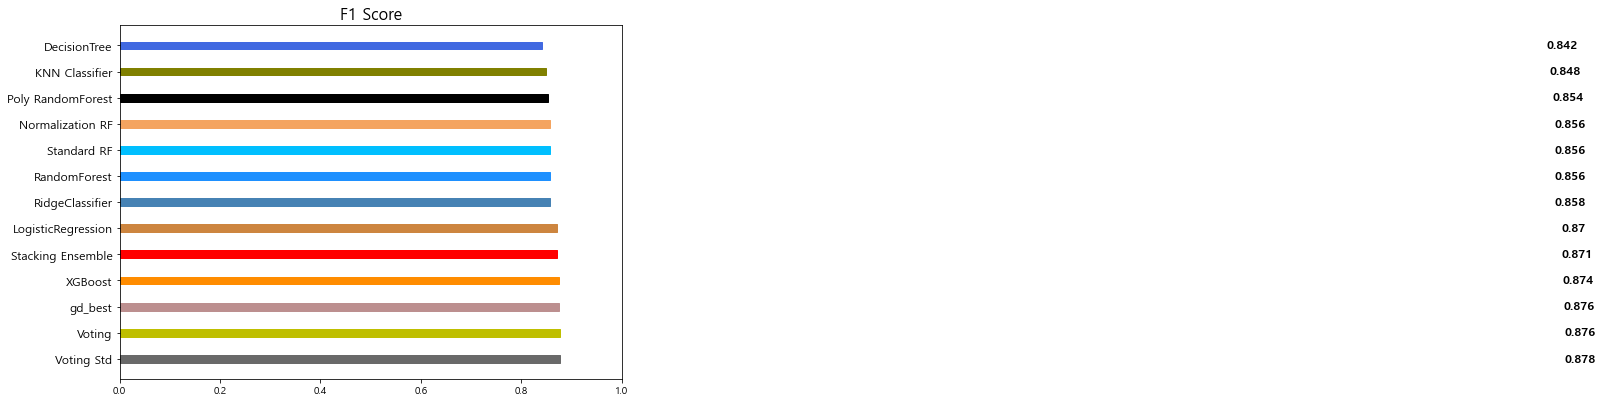

In [260]:
gd_best.fit(X_train, y_train)
gd_best_pred = gd_best.predict(X_test)
f1_eval('gd_best', gd_best_pred, y_test)

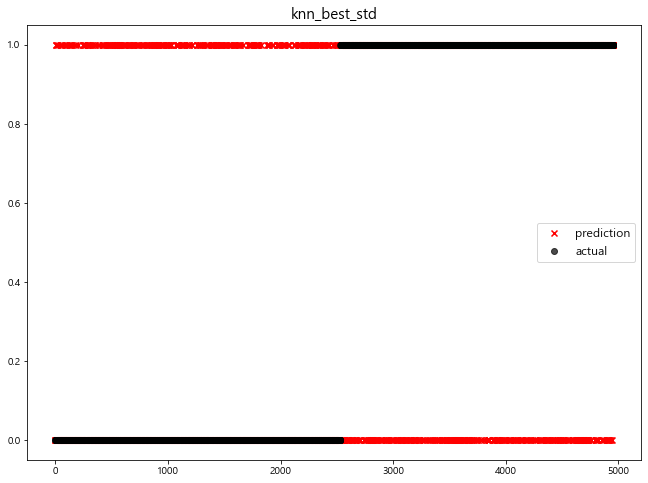

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4              XGBoost  0.874016
5    Stacking Ensemble  0.871434
6   LogisticRegression  0.870495
7      RidgeClassifier  0.857825
8         RandomForest  0.856498
9          Standard RF  0.856498
10    Normalization RF  0.856498
11   Poly RandomForest  0.853993
12      KNN Classifier  0.848310
13        DecisionTree  0.841908


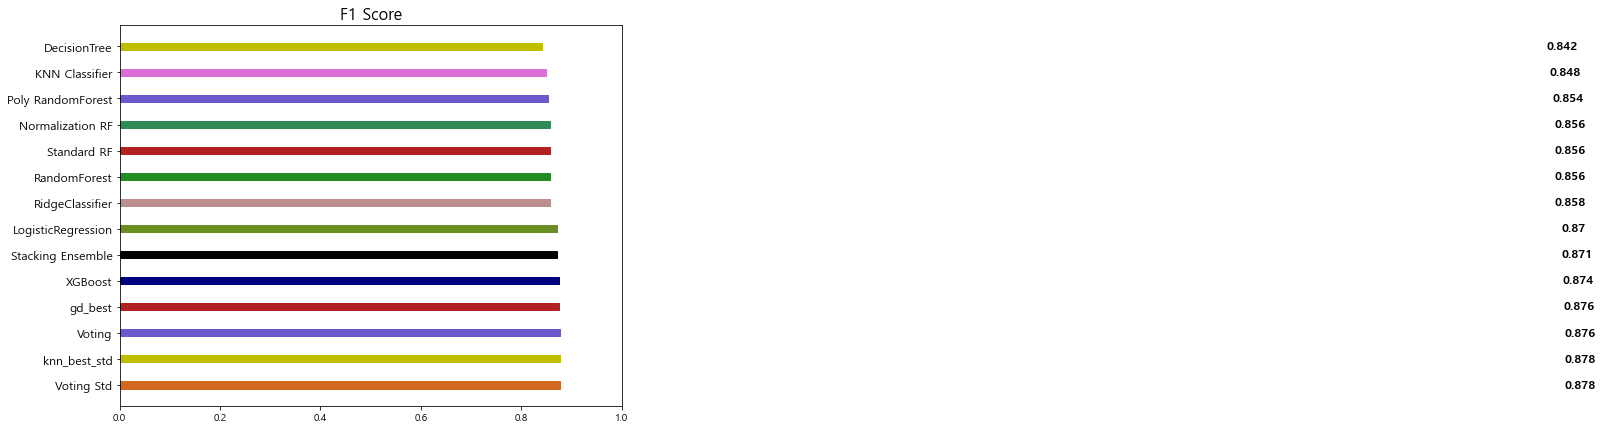

In [261]:
knn_best.fit(X_train, y_train)
knn_best_pred = knn_best.predict(X_test)
f1_eval('knn_best_std', pred, y_test)

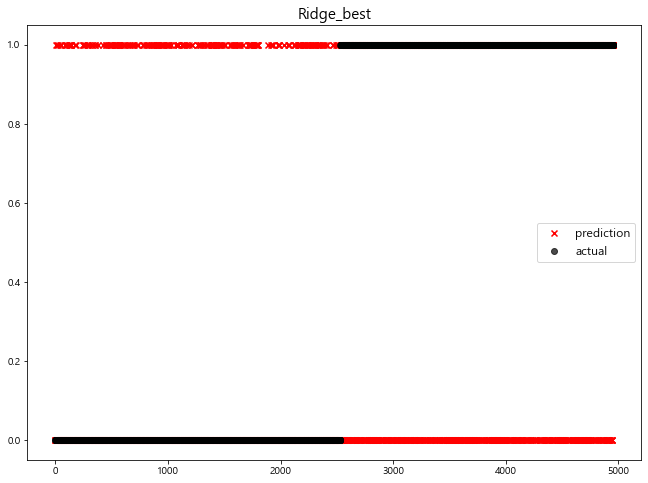

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4              XGBoost  0.874016
5    Stacking Ensemble  0.871434
6   LogisticRegression  0.870495
7           Ridge_best  0.857950
8      RidgeClassifier  0.857825
9         RandomForest  0.856498
10         Standard RF  0.856498
11    Normalization RF  0.856498
12   Poly RandomForest  0.853993
13      KNN Classifier  0.848310
14        DecisionTree  0.841908


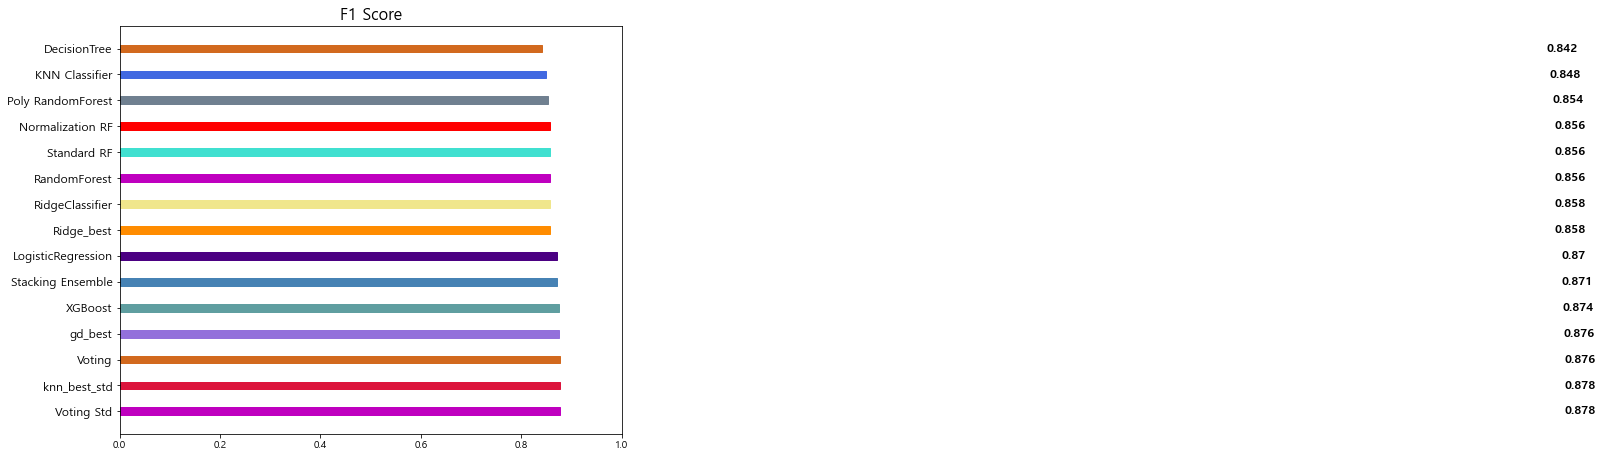

In [262]:
Ridge_best.fit(X_train, y_train)
Ridge_best_pred = Ridge_best.predict(X_test)
f1_eval('Ridge_best', Ridge_best_pred, y_test)

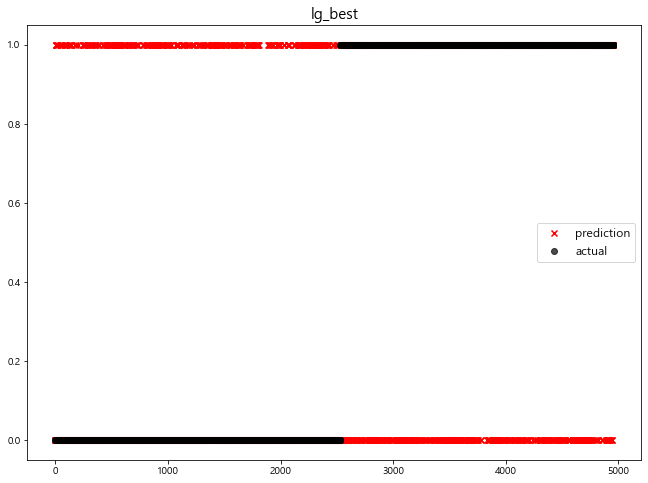

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4              XGBoost  0.874016
5    Stacking Ensemble  0.871434
6   LogisticRegression  0.870495
7              lg_best  0.870495
8           Ridge_best  0.857950
9      RidgeClassifier  0.857825
10        RandomForest  0.856498
11         Standard RF  0.856498
12    Normalization RF  0.856498
13   Poly RandomForest  0.853993
14      KNN Classifier  0.848310
15        DecisionTree  0.841908


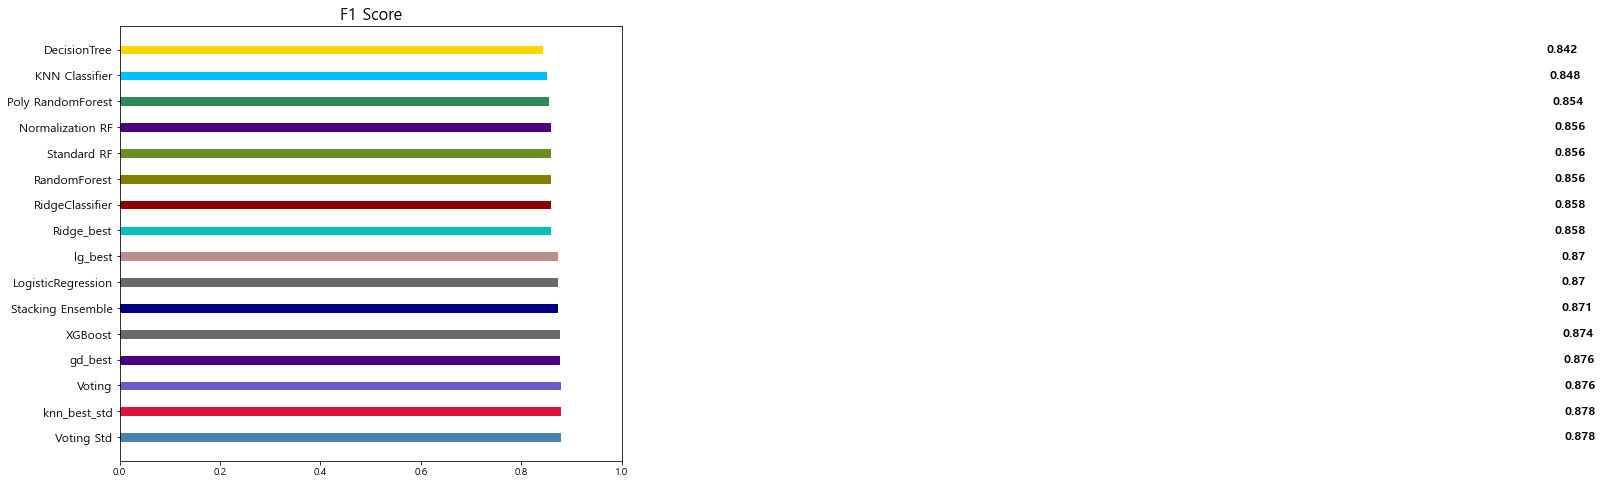

In [263]:
lg_best.fit(X_train, y_train)
lg_best_pred = lg_best.predict(X_test)
f1_eval('lg_best', lg_best_pred, y_test)

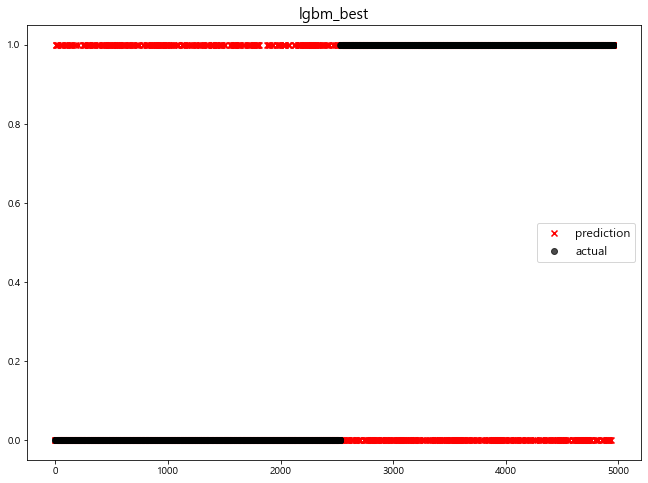

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4            lgbm_best  0.874662
5              XGBoost  0.874016
6    Stacking Ensemble  0.871434
7   LogisticRegression  0.870495
8              lg_best  0.870495
9           Ridge_best  0.857950
10     RidgeClassifier  0.857825
11        RandomForest  0.856498
12         Standard RF  0.856498
13    Normalization RF  0.856498
14   Poly RandomForest  0.853993
15      KNN Classifier  0.848310
16        DecisionTree  0.841908


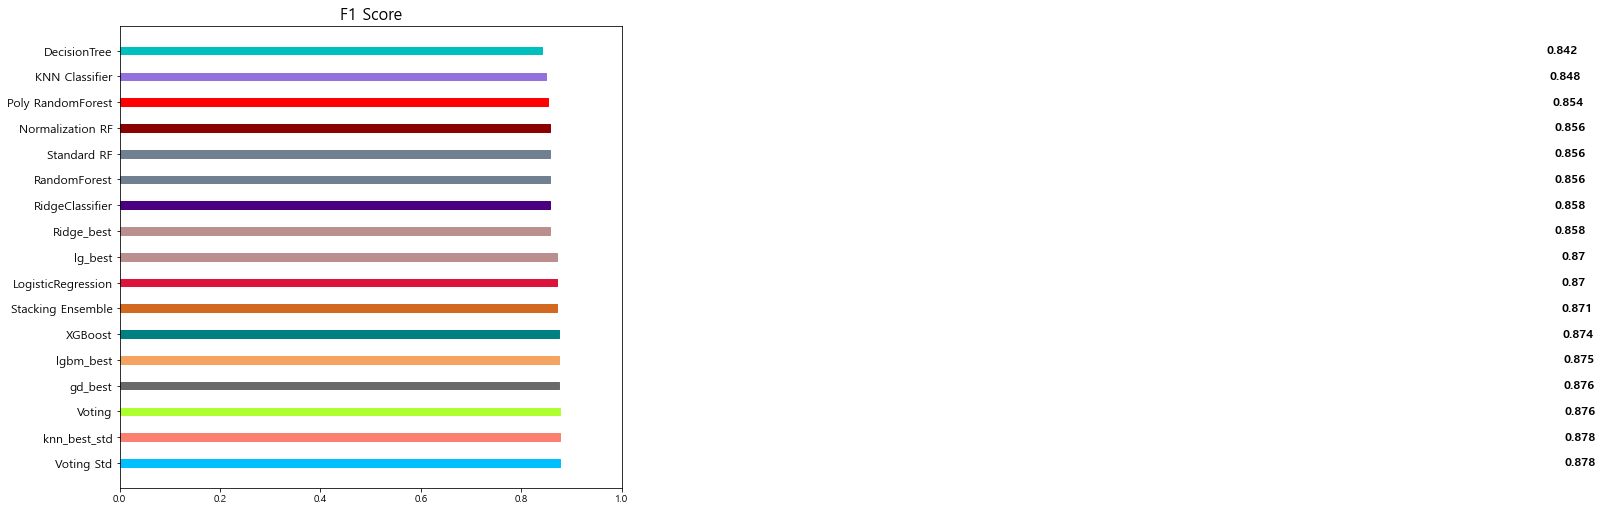

In [264]:
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('lgbm_best', lgbm_best_pred, y_test)

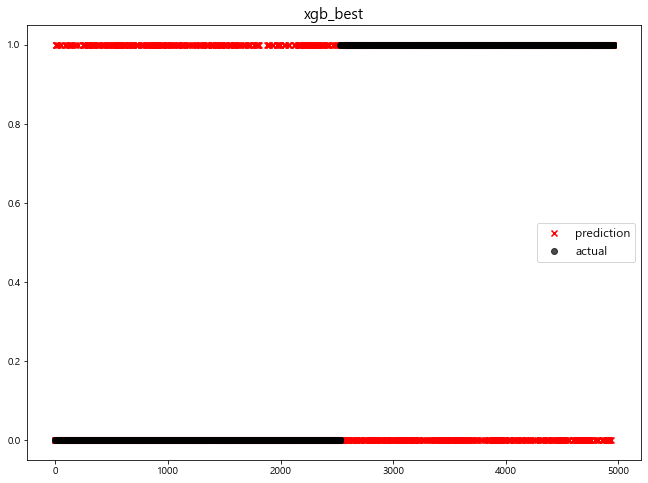

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4            lgbm_best  0.874662
5              XGBoost  0.874016
6             xgb_best  0.873357
7    Stacking Ensemble  0.871434
8   LogisticRegression  0.870495
9              lg_best  0.870495
10          Ridge_best  0.857950
11     RidgeClassifier  0.857825
12        RandomForest  0.856498
13         Standard RF  0.856498
14    Normalization RF  0.856498
15   Poly RandomForest  0.853993
16      KNN Classifier  0.848310
17        DecisionTree  0.841908


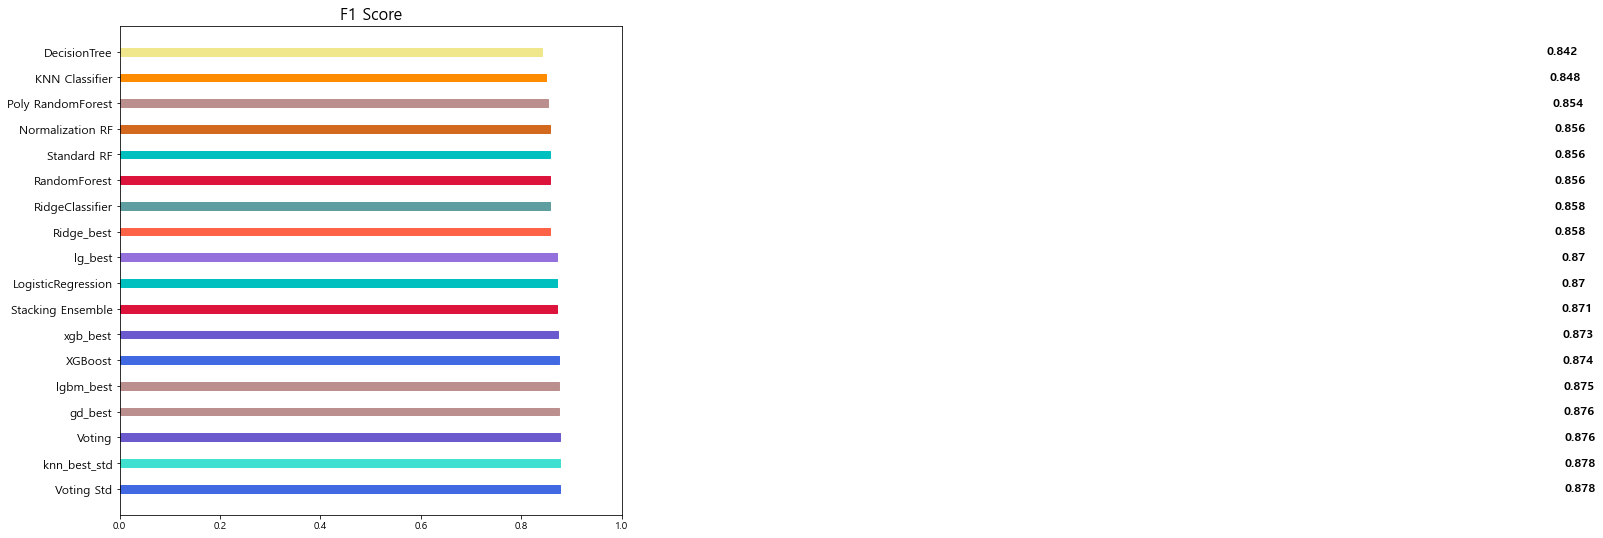

In [265]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
f1_eval('xgb_best', xgb_best_pred, y_test)

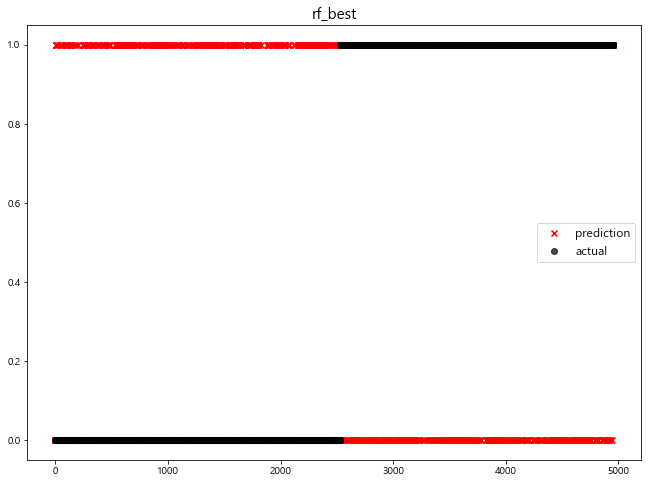

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4            lgbm_best  0.874662
5              XGBoost  0.874016
6             xgb_best  0.873357
7    Stacking Ensemble  0.871434
8   LogisticRegression  0.870495
9              lg_best  0.870495
10             rf_best  0.867674
11          Ridge_best  0.857950
12     RidgeClassifier  0.857825
13        RandomForest  0.856498
14         Standard RF  0.856498
15    Normalization RF  0.856498
16   Poly RandomForest  0.853993
17      KNN Classifier  0.848310
18        DecisionTree  0.841908


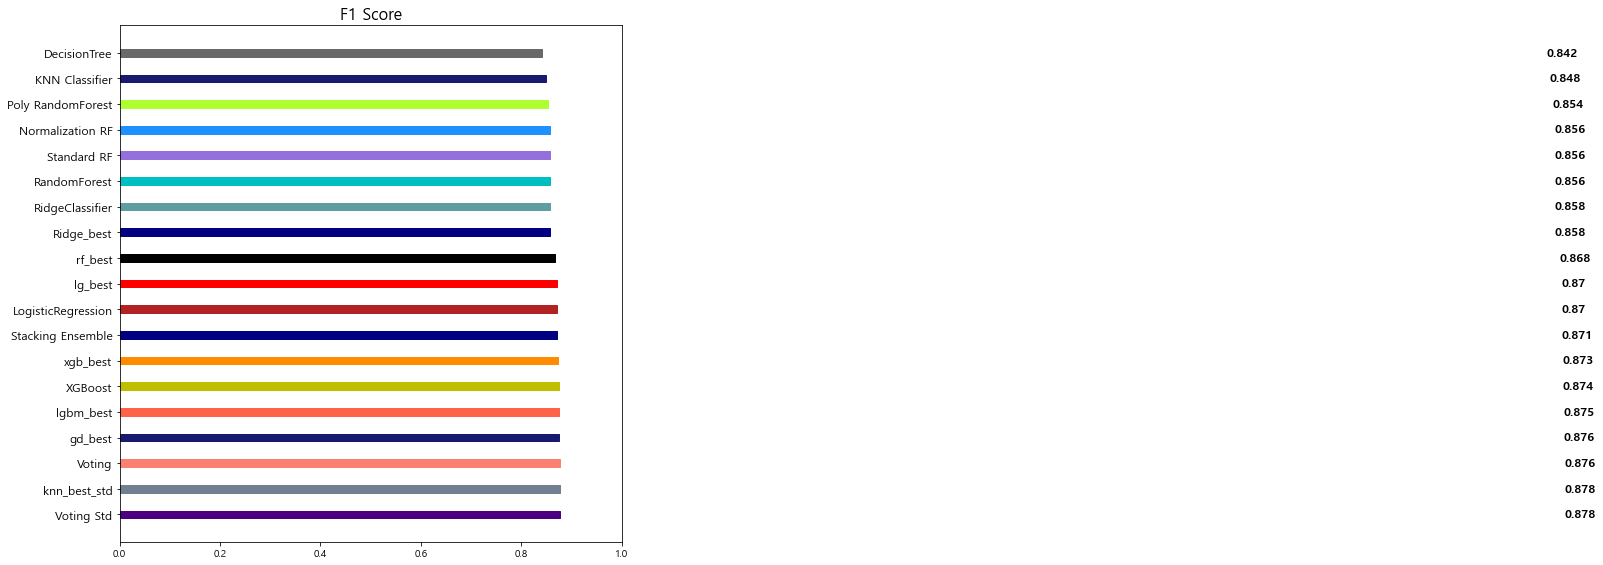

In [266]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('rf_best', rf_best_pred, y_test)

In [267]:
models = [
    # ('Logi', lg_best), 
    # ('ridge', Ridge_best),
    ('knn', knn_best),
    # ('rf', rf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('gradient', gd_best)
]

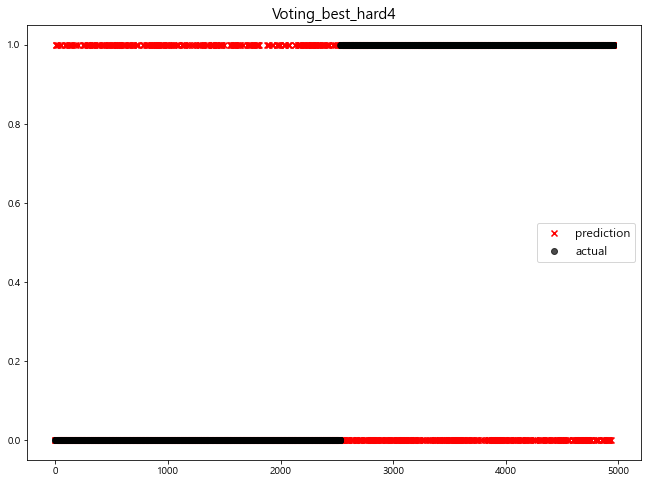

                 model        f1
0           Voting Std  0.877805
1         knn_best_std  0.877805
2               Voting  0.876456
3              gd_best  0.875703
4            lgbm_best  0.874662
5    Voting_best_hard4  0.874579
6              XGBoost  0.874016
7             xgb_best  0.873357
8    Stacking Ensemble  0.871434
9   LogisticRegression  0.870495
10             lg_best  0.870495
11             rf_best  0.867674
12          Ridge_best  0.857950
13     RidgeClassifier  0.857825
14        RandomForest  0.856498
15         Standard RF  0.856498
16    Normalization RF  0.856498
17   Poly RandomForest  0.853993
18      KNN Classifier  0.848310
19        DecisionTree  0.841908


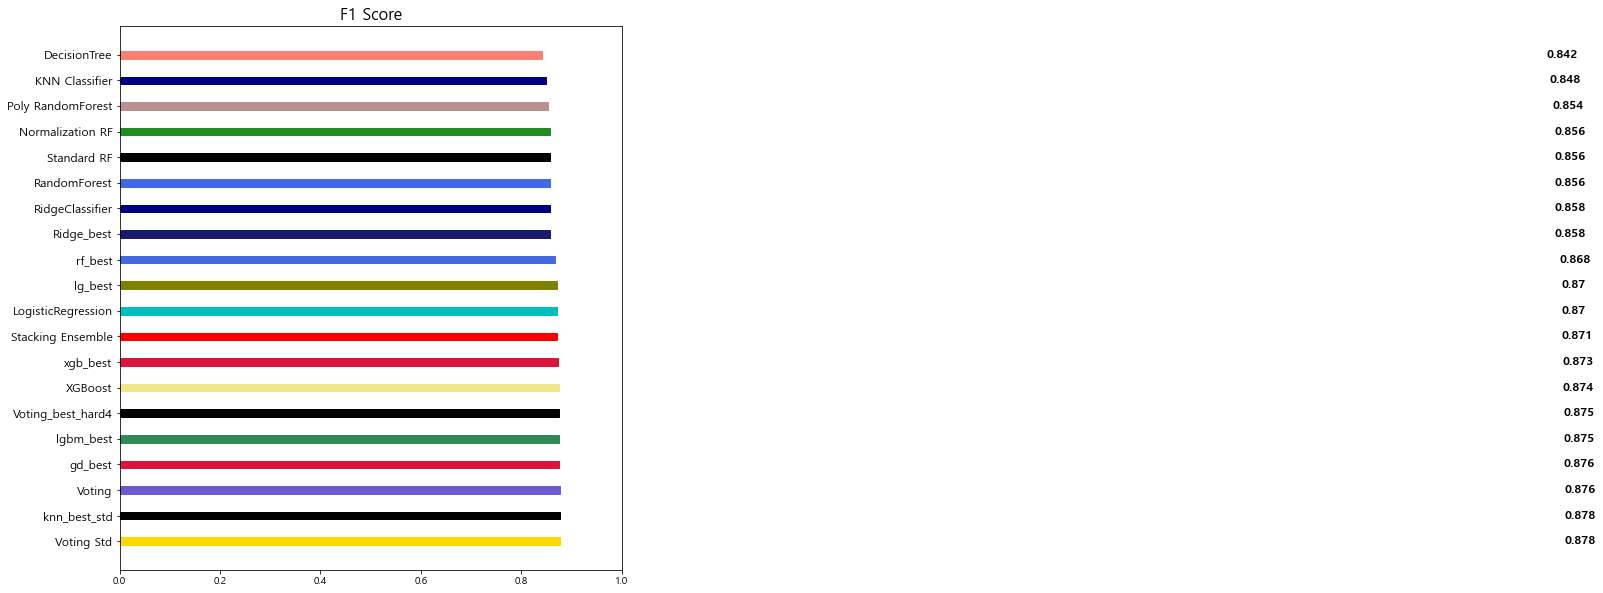

In [268]:
vc = VotingClassifier(models, voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting_best_hard4', pred, y_test)

### **Stacking 결과**

In [269]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('lgbm_std', lgbm_best), 
    ('knn_std', knn_best),
    # ('rf_bset', rf_best),
    ('Ridge', Ridge_best)
]

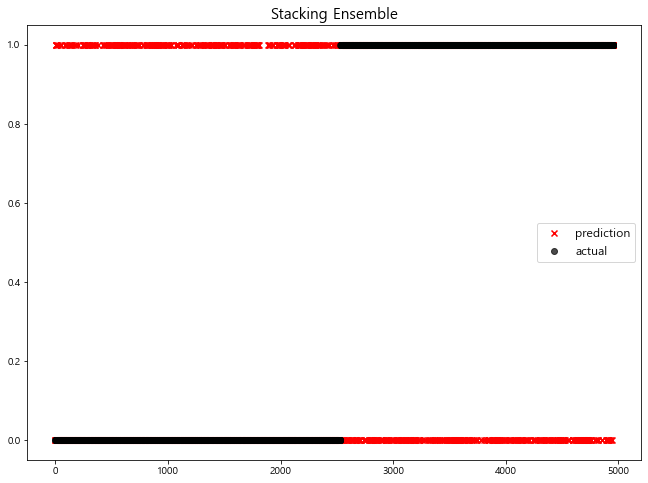

                 model        f1
0    Stacking Ensemble  0.880514
1           Voting Std  0.877805
2         knn_best_std  0.877805
3               Voting  0.876456
4              gd_best  0.875703
5            lgbm_best  0.874662
6    Voting_best_hard4  0.874579
7              XGBoost  0.874016
8             xgb_best  0.873357
9   LogisticRegression  0.870495
10             lg_best  0.870495
11             rf_best  0.867674
12          Ridge_best  0.857950
13     RidgeClassifier  0.857825
14        RandomForest  0.856498
15         Standard RF  0.856498
16    Normalization RF  0.856498
17   Poly RandomForest  0.853993
18      KNN Classifier  0.848310
19        DecisionTree  0.841908


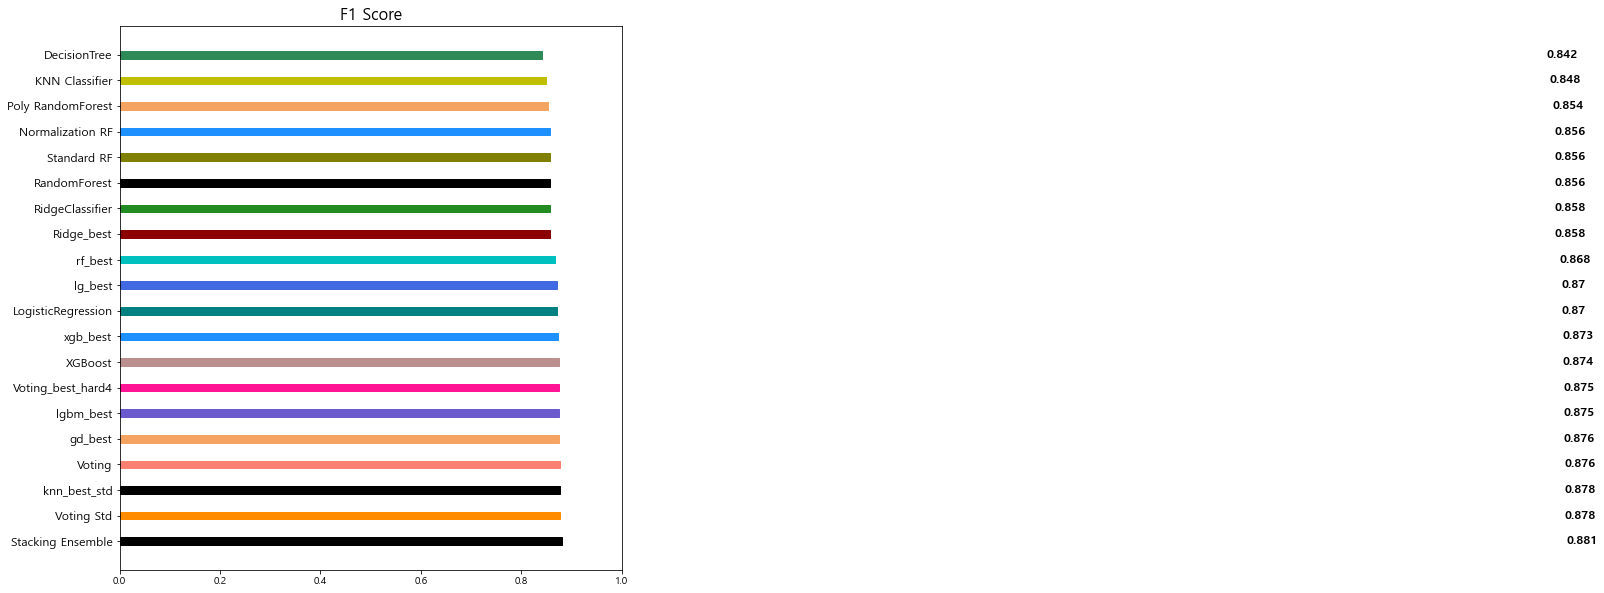

In [270]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb_best, n_jobs=-1)

# 알고리즘 3개만 사용
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [271]:
final_outputs = {
    'xgb_best': xgb_best_pred, 
    'lgbm_std': lgbm_best_pred, 
    'knn_std': knn_best_pred,
    'rf_best': rf_best_pred, 
    'Ridge': Ridge_best_pred,
    'gdb': gd_best_pred,
}

In [272]:
final_prediction=\
final_outputs['Ridge'] * 0.1\
+final_outputs['knn_std'] * 0.2\
+final_outputs['lgbm_std'] * 0.2\
+final_outputs['xgb_best'] * 0.25\
+final_outputs['rf_best'] * 0.15\
+final_outputs['gdb'] * 0.1

In [273]:
# Confusion Matrix로 보여주기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    
plt.show
()

def plot_confusionmatrix(name_, actual,pred):
    cm = confusion_matrix(actual, pred)
    cm = pd.DataFrame(cm, columns=['Lose','Win'], index=['Lose','Win'])# columns=['Lose','Win'], index=['Lose','Win']
    plt.figure(figsize=(11,8))
    sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='YlOrBr')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    
    plt.show()
    print(cm)

def f1_eval(name_, pred, actual):

    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_confusionmatrix(name_, pred, actual)
#    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2



    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
() 

()

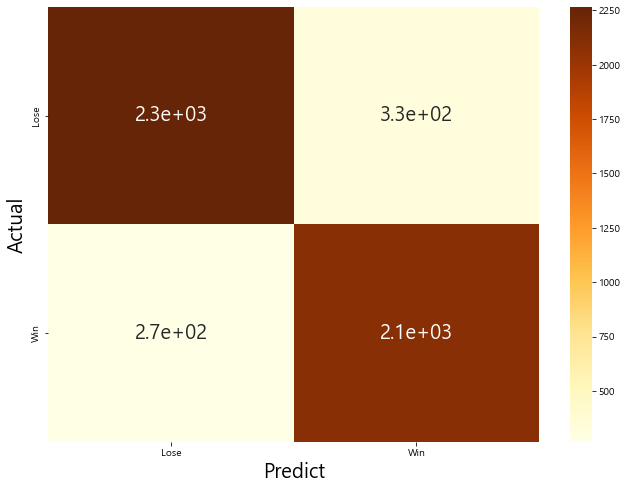

      Lose   Win
Lose  2266   331
Win    266  2094
               model        f1
0  Weighted Blending  0.875235


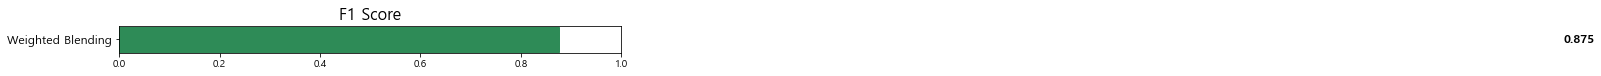

In [274]:
# Weighted Blending score
f1_eval('Weighted Blending', (final_prediction>0.5)+0, y_test)

In [19]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

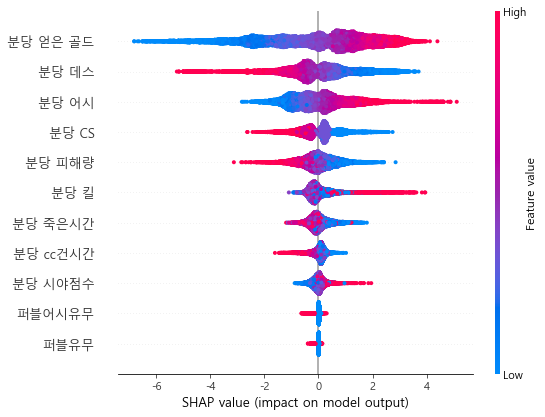

In [27]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
#explainer = shap.TreeExplainer(knn_best)
shap_values = explainer.shap_values(X_train)
fig = shap.summary_plot(shap_values, X_train)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")

In [24]:
shap.plots.force(shap_values,X_test)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [277]:
df

,win,킬수,어시,데스,챔피언에게 가한 피해량,받은 피해량,얻은 골드,cs 수,포탑 골드 획득 갯수,퍼블유무,퍼블어시유무,연속 킬,시야점수,핑와산갯수,와드제거수,설치와드수,게임시간 대비 cc기 건 시간,게임시간 대비 죽은 시간
0,True,5,7,6,10578,15252,9292,119,3,False,False,3,3,1,1,2,0.00,0.07
1,False,4,5,9,13533,17468,9350,119,0,False,False,0,9,1,0,7,0.01,0.12
2,False,0,1,3,1889,6356,4081,76,0,False,False,0,5,0,0,3,0.00,0.06
3,True,0,9,1,5029,3956,6248,122,1,False,True,0,9,1,1,6,0.00,0.01
4,False,5,6,6,13993,19734,11077,185,0,False,False,3,26,3,1,10,0.01,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,True,28,6,6,50598,36042,21787,198,5,False,False,7,14,0,3,7,0.00,0.10
19823,False,2,0,9,10065,22260,12246,201,2,False,False,0,27,2,5,6,0.00,0.15
19824,True,12,12,7,32846,24683,17410,197,4,False,False,5,15,0,2,8,0.01,0.07
19825,True,16,11,5,15235,10336,13916,137,5,True,False,5,12,0,0,7,0.01,0.07
